# Baseline Logistic Model

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from preprocessing import X_train_proc, X_val_proc, X_test_proc, y_train, y_val, y_test, feature_names
import matplotlib.pyplot as plt

RANDOM_STATE = 42

model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
model.fit(X_train_proc, y_train)

print("Model training completed")
print(f"Number of features: {len(feature_names)}")
print(f"Classes: {model.classes_}")

Model training completed
Number of features: 6
Classes: ['NO' 'YES']


In [24]:
y_train_pred = model.predict(X_train_proc)
y_val_pred = model.predict(X_val_proc)
y_test_pred = model.predict(X_test_proc)

y_train_proba = model.predict_proba(X_train_proc)[:, 1]
y_val_proba = model.predict_proba(X_val_proc)[:, 1]
y_test_proba = model.predict_proba(X_test_proc)[:, 1]

print("=== Model Performance ===\n")
print("TRAIN SET:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  ROC-AUC:  {roc_auc_score(y_train, y_train_proba):.4f}")
print(f"  F1-Score: {f1_score(y_train, y_train_pred, pos_label='YES'):.4f}\n")

print("VALIDATION SET:")
print(f"  Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"  ROC-AUC:  {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"  F1-Score: {f1_score(y_val, y_val_pred, pos_label='YES'):.4f}\n")

print("TEST SET:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  ROC-AUC:  {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred, pos_label='YES'):.4f}")


=== Model Performance ===

TRAIN SET:
  Accuracy: 0.8719
  ROC-AUC:  0.7159
  F1-Score: 0.0386

VALIDATION SET:
  Accuracy: 0.8720
  ROC-AUC:  0.7148
  F1-Score: 0.0427

TEST SET:
  Accuracy: 0.8716
  ROC-AUC:  0.7142
  F1-Score: 0.0371


In [25]:
print("\n=== Classification Report (Test Set) ===\n")
print(classification_report(y_test, y_test_pred))


=== Classification Report (Test Set) ===

              precision    recall  f1-score   support

          NO       0.87      1.00      0.93      9150
         YES       0.52      0.02      0.04      1350

    accuracy                           0.87     10500
   macro avg       0.70      0.51      0.48     10500
weighted avg       0.83      0.87      0.82     10500



In [26]:
print("\n=== Confusion Matrix (Test Set) ===\n")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives:  {cm[1, 1]}")


=== Confusion Matrix (Test Set) ===

[[9126   24]
 [1324   26]]

True Negatives:  9126
False Positives: 24
False Negatives: 1324
True Positives:  26


In [27]:
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

feature_importance

,feature,coefficient
0,num__quote_price,-1.738148
4,ohe__platform_web,-1.157427
3,ohe__platform_qw,-0.644966
2,ohe__platform_app,0.512557
1,num__discount,0.191380
5,ord__destinations,-0.000025


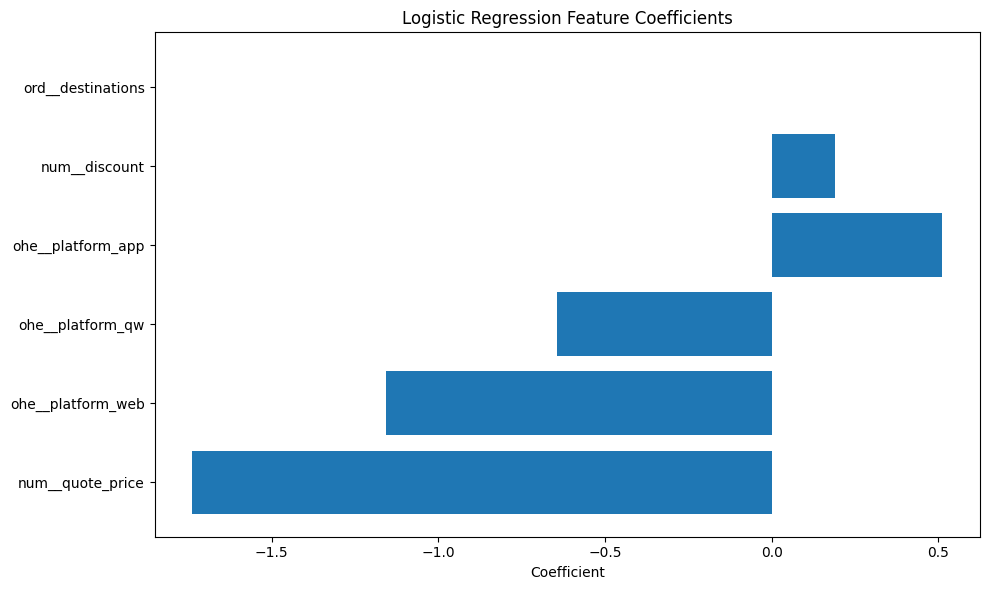

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.xlabel('Coefficient')
plt.title('Logistic Regression Feature Coefficients')
plt.tight_layout()
plt.show()

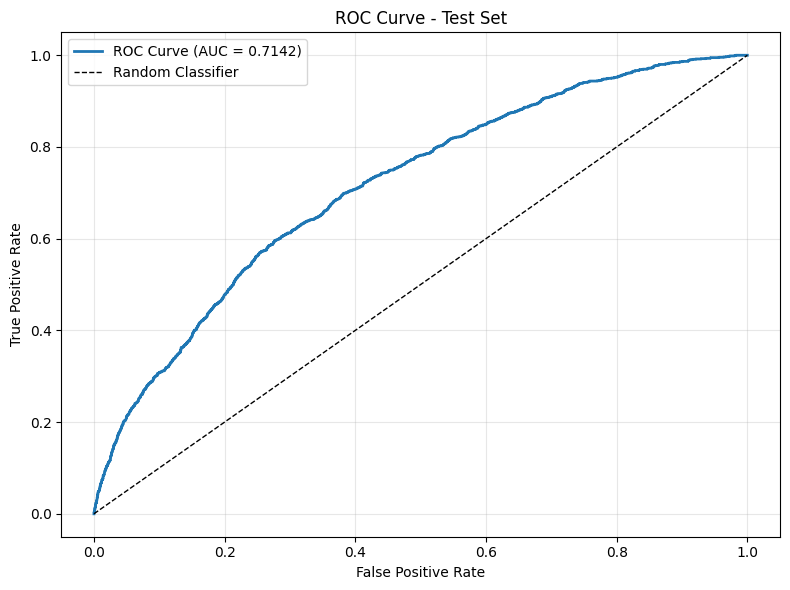

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='YES')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
